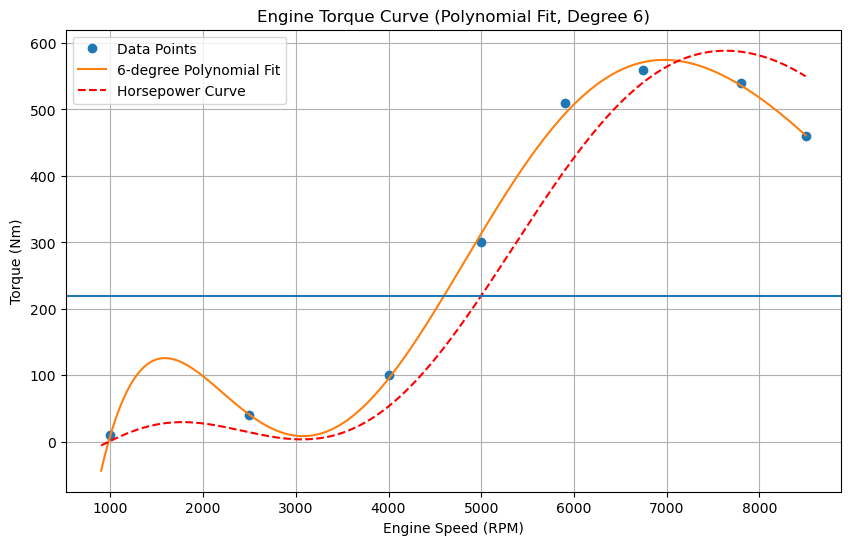

Coefficients of the fitted polynomial:
[-1.58317629e-19  5.67085590e-15 -7.93868002e-11  5.39548451e-07
 -1.80442133e-03  2.75014293e+00 -1.40147470e+03]
"coefficient_0": -1401.47470465079,
"coefficient_1": 2.7501429252397367,
"coefficient_2": -0.0018044213284459747,
"coefficient_3": 5.395484505986165e-07,
"coefficient_4": -7.938680024800937e-11,
"coefficient_5": 5.670855896687725e-15,
"coefficient_6": -1.5831762866351183e-19,


In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
points = np.array([
    [1000, 10],
    [2500, 40],
    [4000, 100],
    [5000, 300],
    [5900, 510],
    [6750, 560],
    [7800, 540],
    [8500, 460]
])
maxTq = 220
rpm = points[:, 0]
torque = points[:, 1]

degree = 6
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min()-100, rpm.max(), 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
hp_smooth = (torque_smooth * rpm_smooth) / 7127
plt.plot(rpm_smooth, hp_smooth, '--', label="Horsepower Curve", color="red")

plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')


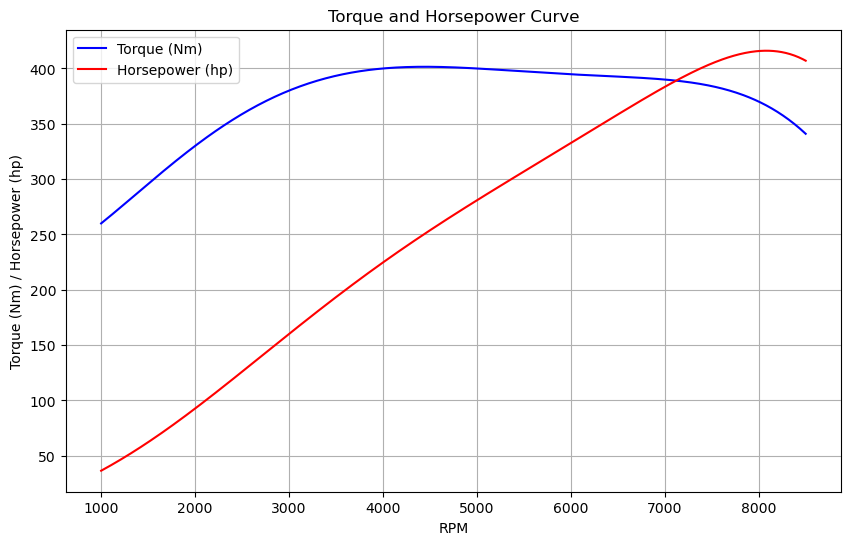

RPM = 1000, Torque = 260.00 Nm, Horsepower = 36.51 hp
RPM = 2000, Torque = 330.00 Nm, Horsepower = 92.68 hp
RPM = 3500, Torque = 393.41 Nm, Horsepower = 193.36 hp
RPM = 5000, Torque = 400.00 Nm, Horsepower = 280.86 hp
RPM = 7000, Torque = 390.00 Nm, Horsepower = 383.38 hp
RPM = 8300, Torque = 355.00 Nm, Horsepower = 413.78 hp
RPM = 8500, Torque = 340.99 Nm, Horsepower = 407.03 hp


In [136]:
import numpy as np
import matplotlib.pyplot as plt

def plot_poly_with_hp(coeff_dict, x_start, x_end, num_points=500):
    coeffs = [coeff_dict[f"coefficient_{i}"] for i in range(len(coeff_dict))]
    coeffs = coeffs[::-1]  # reverse order

    rpm = np.linspace(x_start, x_end, num_points)
    torque = np.polyval(coeffs, rpm)  # torque in Nm

    # Calculate horsepower
    power_watts = torque * (2 * np.pi * rpm) / 60
    horsepower = power_watts / 745.7

    plt.figure(figsize=(10,6))
    plt.plot(rpm, torque, label='Torque (Nm)', color='blue')
    plt.plot(rpm, horsepower, label='Horsepower (hp)', color='red')
    plt.xlabel('RPM')
    plt.ylabel('Torque (Nm) / Horsepower (hp)')
    plt.title('Torque and Horsepower Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

    return coeffs

def evaluate_and_print(coeffs, x_values):
    y_values = np.polyval(coeffs, x_values)
    for xv, yv in zip(x_values, y_values):
        power_w = yv * (2 * np.pi * xv) / 60
        hp = power_w / 745.7
        print(f"RPM = {xv:.0f}, Torque = {yv:.2f} Nm, Horsepower = {hp:.2f} hp")

coefficients_dict = {
    "coefficient_0": 2.16693393e2,
    "coefficient_1": 1.64150666e-3,
    "coefficient_2": 6.10191466e-5,
    "coefficient_3": -2.22780739e-8,
    "coefficient_4": 3.09136264e-12,
    "coefficient_5": -1.69350762e-16,
    "coefficient_6": 2.01594374e-21,
}

coeffs = plot_poly_with_hp(coefficients_dict, 1000, 8500)

x_points = [1000, 2000, 3500, 5000, 7000, 8300, 8500]
evaluate_and_print(coeffs, x_points)
